In [6]:
# Pandas
import pandas as pd

from sqlalchemy import create_engine

import databaseconfig as cfg

engine = create_engine(
                'postgresql://' + cfg.mysql['user'] + ':' + cfg.mysql['passwd'] + '@' + cfg.mysql['host'] + '/'+cfg.mysql['db'])
     
connection = engine.connect()

sql_command = "SELECT Employees.emp_no, Employees.last_name, Employees.first_name, Employees.gender, Salaries.salary, Titles.title FROM Salaries JOIN Employees ON Employees.emp_no=Salaries.emp_no JOIN Titles ON Employees.emp_no=Titles.emp_no"

data = pd.read_sql(sql_command, connection)

data.head()

connection.close()  # connection is closed for real, the pool replaces it with a new connection

In [7]:
data.head()

,emp_no,last_name,first_name,gender,salary,title
0,10005,Maliniak,Kyoichi,M,78228,Senior Staff
1,10005,Maliniak,Kyoichi,M,78228,Staff
2,10010,Piveteau,Duangkaew,F,72488,Engineer
3,10011,Sluis,Mary,F,42365,Staff
4,10013,Terkki,Eberhardt,M,40000,Senior Staff


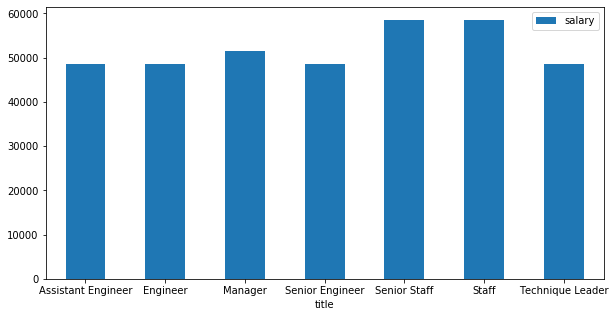

In [20]:
df = data.groupby('title').mean()
df = df.drop(['emp_no'], axis=1)

ax = df.plot.bar(rot=0,figsize=(10,5))